<a href="https://colab.research.google.com/github/ArseneGiriteka/PyTorch_Deep_Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another there can be multiple things as the options).

  ## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of x: {x[:5]}")
print(f"First 5 samples of Y: {y[:5]}")

First 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: [1 1 1 1 0]


In [ ]:
# Make a dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": x[:, 0], "X2": x[:, 1], "label": y})

circles.head(20)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


from matplotlib import pyplot as plt
_df_0['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X2', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

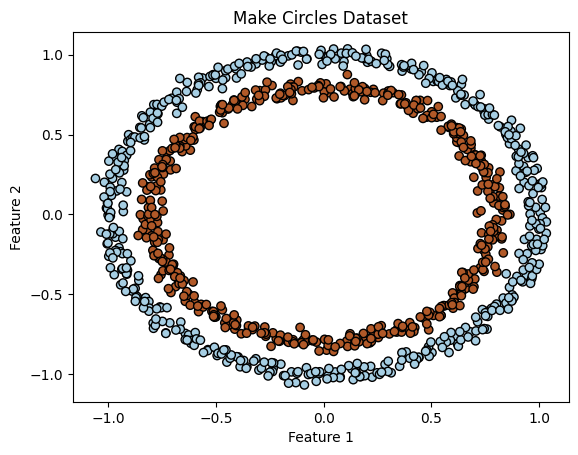

In [27]:
import matplotlib.pyplot as plt

# Plot the circles
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Make Circles Dataset")
plt.show()

 **Note**: The data we ara working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Checking input and output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first expamle of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for onr sample of x: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for onr sample of x: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for onr sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for onr sample of x: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), type(Y), X.dtype, Y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [25]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and an optimizer
4. Create a training and test loop

In [1]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'